In [1]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer, Conv2D, MaxPooling2D

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
root_dir = os.path.abspath('.')
data_dir = 'C:/Users/ankit/Desktop/Pyprojects'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

Age:  MIDDLE


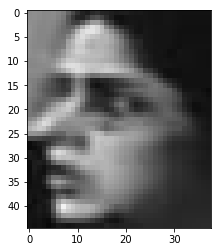

In [3]:
i = random.choice(train.index)

img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train', img_name))

print('Age: ', train.Class[i])
imshow(img)


In [4]:
from scipy.misc import imresize
x = []
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    x.append(img.shape[0])
    img = imresize(img, (64, 64))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

In [5]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    x.append(img.shape[0])
    img = imresize(img, (64, 64))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [6]:
median(x)

97.0

In [7]:
train_x.shape
train_x = train_x / 255.
test_x = test_x / 255.

In [8]:
train_x.shape

(19906, 64, 64, 3)

In [9]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [10]:
test['Class'] = 'MIDDLE'
test.to_csv('C:/Users/ankit/Desktop/Pyprojects/all_middle.csv', index=False)

In [11]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

In [12]:
input_num_units = (64, 64, 3)
#hidden_num_units = 500
output_num_units = 3
epochs = 10
batch_size = 128

In [13]:
from keras.layers import Dropout
pool_size = (2,2)
model = Sequential([
 InputLayer(input_shape=input_num_units),

 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.25),
    
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.25),
    
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D(pool_size=pool_size),
 Dropout(0.25),       
 #Conv2D(256, (2, 2), activation='relu'),
 #Dropout(0.25),
 Flatten(),
 Dense(units=512, activation='relu'),
 Dropout(0.5),
 Dense(units=output_num_units, activation='softmax'),
])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
__________

In [18]:
seed(128)
from keras import metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=20,verbose=1, validation_split=0.25)

Train on 14929 samples, validate on 4977 samples
Epoch 1/20
14929/14929 [==============================] - 12s - loss: 0.1036 - acc: 0.9633 - val_loss: 0.7180 - val_acc: 0.8252
Epoch 2/20
14929/14929 [==============================] - 11s - loss: 0.1017 - acc: 0.9615 - val_loss: 0.7144 - val_acc: 0.8198
Epoch 3/20
14929/14929 [==============================] - 11s - loss: 0.1047 - acc: 0.9633 - val_loss: 0.7294 - val_acc: 0.8230
Epoch 4/20
14929/14929 [==============================] - 11s - loss: 0.1107 - acc: 0.9592 - val_loss: 0.6645 - val_acc: 0.8280
Epoch 5/20
14929/14929 [==============================] - 11s - loss: 0.0956 - acc: 0.9659 - val_loss: 0.7152 - val_acc: 0.8228
Epoch 6/20
14929/14929 [==============================] - 11s - loss: 0.1033 - acc: 0.9616 - val_loss: 0.6759 - val_acc: 0.8226
Epoch 7/20
14929/14929 [==============================] - 11s - loss: 0.0970 - acc: 0.9638 - val_loss: 0.6532 - val_acc: 0.8246
Epoch 8/20
14929/14929 [==============================]

In [19]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('C:/Users/ankit/Desktop/Pyprojects/cnn_extra_dense_cnndropout_epc_55.csv', index=False)

6560/6636 [============================>.] - ETA: 0s